# Image Classification

### Author: Branden Adems Anak Kiethson - AI04

## 1. Import Libraries and Packages

In [1]:
import os
import tensorflow as tf
import keras.api._v2.keras as keras
import cv2
import imghdr
import numpy as np
import datetime
from tensorflow.keras.callbacks import TensorBoard
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers

## 2. Path Directory

In [2]:
DATA_PATH = os.path.join(os.getcwd(), 'data')
LOG_PATH = os.path.join(os.getcwd(),'Log')
MODEL_SAVE = os.path.join(os.getcwd(),'Saved_Model','model_image_classification.h5')

In [3]:
img_exts =  ['jpeg', 'jpg', 'bmp', 'png']

## 2.1 Data Cleaning

### Checking for Unwanted images

In [4]:
for image_class in os.listdir(DATA_PATH):
    for image in os.listdir(os.path.join(DATA_PATH, image_class)):
        image_path = os.path.join(DATA_PATH, image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

## 3. Load Data

In [5]:
data = keras.utils.image_dataset_from_directory(DATA_PATH)

Found 40000 files belonging to 2 classes.


In [6]:
data_iterator = data.as_numpy_iterator()

In [7]:
batch = data_iterator.next()

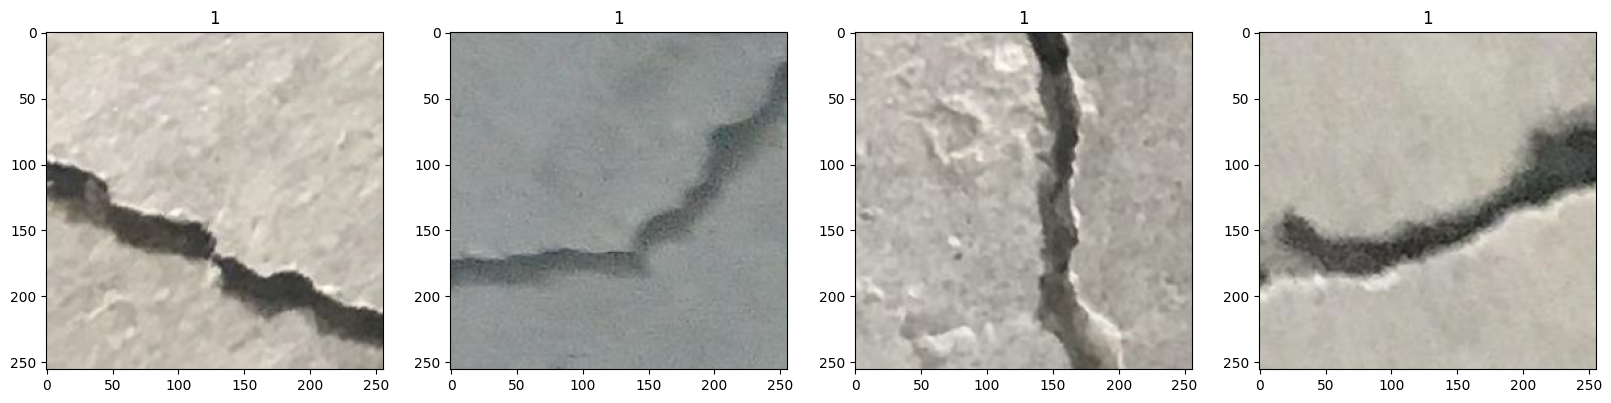

In [8]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [9]:
data = data.map(lambda x,y: (x/255,y))

In [10]:
data.as_numpy_iterator().next()

(array([[[[0.69803923, 0.68235296, 0.63529414],
          [0.7012944 , 0.68560815, 0.6385493 ],
          [0.70477176, 0.6890855 , 0.64202666],
          ...,
          [0.71542585, 0.6997396 , 0.65268075],
          [0.7084712 , 0.6927849 , 0.6457261 ],
          [0.7019608 , 0.6862745 , 0.6392157 ]],
 
         [[0.66874236, 0.6530561 , 0.60599726],
          [0.6746996 , 0.65901333, 0.6119545 ],
          [0.6810634 , 0.66537714, 0.6183183 ],
          ...,
          [0.71634775, 0.7006615 , 0.65360266],
          [0.71117324, 0.69548696, 0.64842814],
          [0.7019608 , 0.6862745 , 0.6392157 ]],
 
         [[0.6430683 , 0.62738204, 0.5803232 ],
          [0.64957875, 0.6338925 , 0.58683366],
          [0.6585483 , 0.642862  , 0.5958032 ],
          ...,
          [0.71653646, 0.7008502 , 0.65379137],
          [0.71220404, 0.69651777, 0.64945894],
          [0.70477176, 0.6890855 , 0.64202666]],
 
         ...,
 
         [[0.59528184, 0.5913603 , 0.52077204],
          [0.58638

## 5. Split Data

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) # for tuning parameters like number of hidden layers/picking the best model
test_size = int(len(data)*.1) # solely for getting the performance of the model

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Building Deep Learning Model

In [13]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary() # to see the overall structure of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

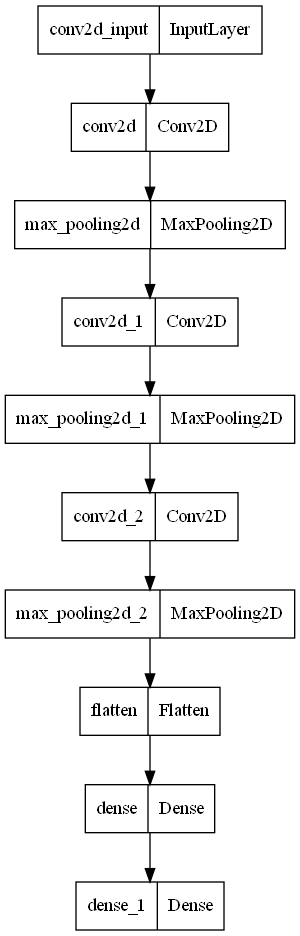

In [44]:
keras.utils.plot_model(model)

In [17]:
log_dir = os.path.join(LOG_PATH, datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [18]:
early_stopping_callback = EarlyStopping(patience=3)

In [19]:
print(train)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [20]:
hist = model.fit(train, epochs=20, validation_data=val, batch_size=350, callbacks=[tensorboard_callback, early_stopping_callback])

Epoch 1/20
875/875 [==============================] - 95s 104ms/step - loss: 0.1132 - accuracy: 0.9609 - val_loss: 0.1111 - val_accuracy: 0.9755
Epoch 2/20
875/875 [==============================] - 90s 103ms/step - loss: 0.0526 - accuracy: 0.9841 - val_loss: 0.0639 - val_accuracy: 0.9808
Epoch 3/20
875/875 [==============================] - 84s 95ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0301 - val_accuracy: 0.9910
Epoch 4/20
875/875 [==============================] - 88s 100ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0304 - val_accuracy: 0.9912
Epoch 5/20
875/875 [==============================] - 85s 97ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0217 - val_accuracy: 0.9942
Epoch 6/20
875/875 [==============================] - 86s 98ms/step - loss: 0.0184 - accuracy: 0.9947 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 7/20
875/875 [==============================] - 86s 99ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0269 - val_accura

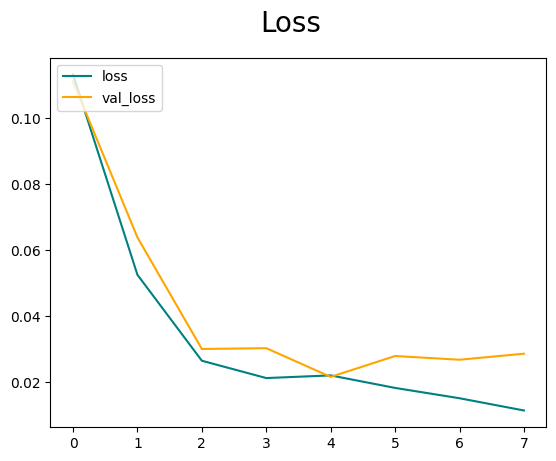

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

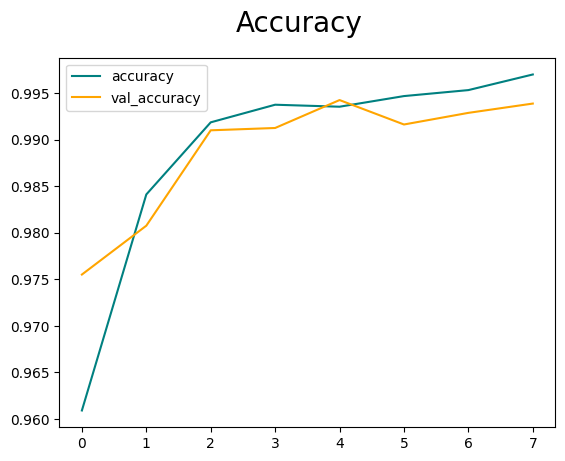

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 7.0 Evaluate

In [23]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [24]:
for batch in test.as_numpy_iterator():
    x,y = batch
    pred = model.predict(x)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y,pred)

1/1 [==============================] - 0s 146ms/step


In [45]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

0.99500996 0.996004 0.9955


## 8. Test Results

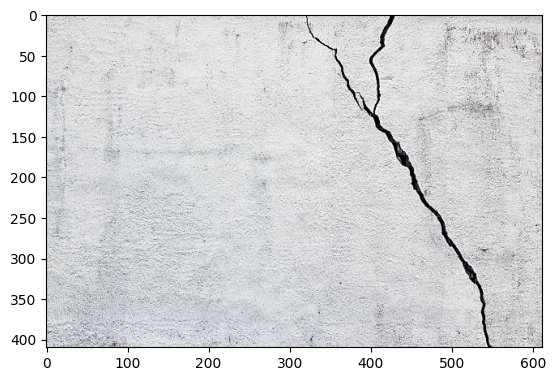

In [40]:
img = cv2.imread('test_data_1.jpg')
resize = tf.image.resize(img, (256, 256))
plt.imshow(img)
plt.show()

In [41]:
y_pred = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 103ms/step


In [42]:
y_pred

array([[1.]], dtype=float32)

In [43]:
if y_pred < 0.5:
    print(f'Predicted class is No Cracks(Negative)')
else:
    print(f'Predicted class is Cracks(Positive)')

Predicted class is Cracks(Positive)


## 9. Save The Model

In [31]:
keras.models.save_model(model,MODEL_SAVE)

## 10. Deploy the model

In [32]:
load_model = load_model('./Saved_Model/model_image_classification.h5')

In [33]:
load_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 222ms/step


array([[1.]], dtype=float32)

In [34]:
if y_pred < 0.5:
    print(f'Predicted class is No Cracks(Negative)')
else:
    print(f'Predicted class is Cracks(Positive)')

Predicted class is Cracks(Positive)
